In [18]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import hvplot.pandas
import plotly.express as px
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
recipes_df = pd.read_csv('../Exported_datafiles/fully_encoded_recipes_with_cuisine_from_SP.csv', index_col=[0])
recipes_df

,cuisine_SP,cumin,onion,garlic,vanilla,lemon,bell pepper,tomato,chocolate,mushrooms,...,harissa,sprouts,squash blossoms,grapefruit,tamarind pulp,savory,baharat,douchi,sucralose,jicama
5,8,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,11,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,10,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,11,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9981,10,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9984,10,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9988,11,1,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# recipes_df.columns.tolist()

In [106]:
spice_df = recipes_df[['cumin', 'cinnamon', 'ginger', 'thyme', 
                      'basil', 'fresh pepper', 'cilantro', 'chili powder', 'nutmeg',
                      'cayenne', 'bay leaves', 'oregano', 'paprika', 'prepared mustard', 'mint', 
                      'rosemary','chives', 'curry', 'turmeric','dill', 'mustard seed','coriander', 'sage', 
                       'fresh chile', 'clove', 'flaxseed', 
                      'cardomom', 'allspice', 'dried chile', 'tarragon', 
                      'marjoram', 'celery salt', 
                      'horseradish', 'saffron', 'asafoetida', 'celery seed',
                       'herbes de provence', 'chinese five spice','fenugreek', 'gochujang', 'xylitol', 
                      'green tea bag', 'masa harina', 'thai chili', 'lemon grass', 'boquerones',
                       'chai spice', 'amchoor', 'tea', 'star anise', 'ajwain', 
                      'anise', 'caraway seeds', 'wasabi powder', 'miso', 'fresh lavender',
                       'lemon pepper', 'hibiscus', 'carob powder', 'zaatar', 
                      'matcha', 'rose water', 'quark','file powder', 
                      'kefir', 'harissa', 'savory', 'baharat', 'douchi']].copy()

In [107]:
spice_df

,cumin,cinnamon,ginger,thyme,basil,fresh pepper,cilantro,chili powder,nutmeg,cayenne,...,zaatar,matcha,rose water,quark,file powder,kefir,harissa,savory,baharat,douchi
5,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9981,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9984,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9988,1,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
encoding_df = pd.read_csv('../Random_forests_models/cuisine_encoding_dict.csv', index_col=[0])

In [109]:
spice_df.to_csv('../Exported_datafiles/just_spices_and_SP_cuisines.csv')

## Perform PCA to see if there is a natural clustering

In [110]:
variance_ratio_list = []
for i in range (2,12):
    component_analysis = PCA(n_components = i).fit(spice_df)
    components = component_analysis.transform(spice_df)
    variance_ratio_list.append(sum(component_analysis.explained_variance_ratio_))


In [111]:
variance_ratio_list

[0.238598211970801,
 0.311523818692238,
 0.38014667291583576,
 0.44723129824714014,
 0.5016097885248461,
 0.5510463915151634,
 0.5966747911297975,
 0.6385302778195643,
 0.6757916895655238,
 0.7039766984744302]

In [112]:
variance_ratio_list_indexes = [x for x in range(2,12)]

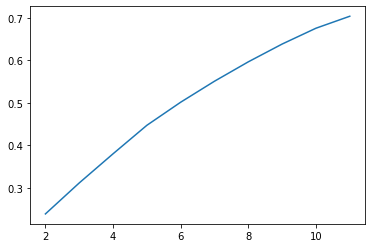

In [113]:
plt.plot(variance_ratio_list_indexes, variance_ratio_list[:])

In [114]:
component_analysis = PCA(n_components = 3).fit(spice_df)
components = component_analysis.transform(spice_df)

In [115]:
components

array([[ 0.31971725,  1.19389648,  0.57601379],
       [-0.10849532, -0.18470025,  0.10686164],
       [ 0.53412707,  0.44750085,  0.90264674],
       ...,
       [-0.2314726 , -0.22330912,  0.13135986],
       [ 1.91765421, -0.07136339, -0.62300793],
       [-0.24877261,  0.19889288,  0.25427361]])

In [116]:
spice_df['component_1'] = components[:,0]
spice_df['component_2'] = components[:,1]
spice_df['component_3'] = components[:,2]
spice_df

,cumin,cinnamon,ginger,thyme,basil,fresh pepper,cilantro,chili powder,nutmeg,cayenne,...,quark,file powder,kefir,harissa,savory,baharat,douchi,component_1,component_2,component_3
5,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.319717,1.193896,0.576014
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.108495,-0.184700,0.106862
16,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.534127,0.447501,0.902647
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.251291,-0.074912,-0.010676
20,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.153038,-0.297236,0.128650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.165947,-0.417421,-0.012223
9981,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.153038,-0.297236,0.128650
9984,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.231473,-0.223309,0.131360
9988,1,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,1.917654,-0.071363,-0.623008


In [117]:
fig = px.scatter_3d(spice_df, x='component_1', y='component_2',z='component_3', width = 800)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [118]:
X_for_KMeans = spice_df[['component_1','component_2','component_3']]

In [119]:
X_for_KMeans

,component_1,component_2,component_3
5,0.319717,1.193896,0.576014
10,-0.108495,-0.184700,0.106862
16,0.534127,0.447501,0.902647
17,-0.251291,-0.074912,-0.010676
20,-0.153038,-0.297236,0.128650
...,...,...,...
9978,1.165947,-0.417421,-0.012223
9981,-0.153038,-0.297236,0.128650
9984,-0.231473,-0.223309,0.131360
9988,1.917654,-0.071363,-0.623008


In [120]:
inertias = []
for k in range (2,10):
    kmeans_model = KMeans(n_clusters = k, random_state=42)
    kmeans_model.fit(X_for_KMeans)
    classes = kmeans_model.predict(X_for_KMeans)
    inertias.append([k,kmeans_model.inertia_])
inertias

[[2, 692.6456087585609],
 [3, 528.3396254350226],
 [4, 383.12066599311686],
 [5, 317.9002768490245],
 [6, 276.3454619674479],
 [7, 241.17695517662676],
 [8, 203.02138816709123],
 [9, 177.07076401233533]]

In [121]:
inertias_df = pd.DataFrame(inertias, columns=['k','inertia'])
inertias_df

,k,inertia
0,2,692.645609
1,3,528.339625
2,4,383.120666
3,5,317.900277
4,6,276.345462
5,7,241.176955
6,8,203.021388
7,9,177.070764


<AxesSubplot:xlabel='k'>

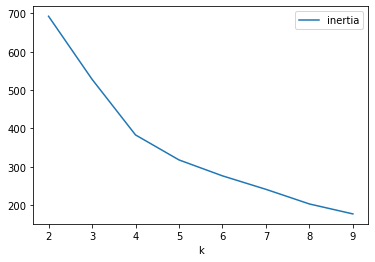

In [122]:
inertias_df.plot(x='k', y='inertia')

In [123]:
kmeans_model_5 = KMeans(n_clusters=5, random_state=42)
kmeans_model_5.fit(X_for_KMeans)
predicted_class = kmeans_model_5.predict(X_for_KMeans)
predicted_class

array([4, 1, 4, ..., 1, 3, 1])

In [124]:
spice_df['classes'] = predicted_class
spice_df

,cumin,cinnamon,ginger,thyme,basil,fresh pepper,cilantro,chili powder,nutmeg,cayenne,...,file powder,kefir,harissa,savory,baharat,douchi,component_1,component_2,component_3,classes
5,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0.319717,1.193896,0.576014,4
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.108495,-0.184700,0.106862,1
16,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0.534127,0.447501,0.902647,4
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.251291,-0.074912,-0.010676,1
20,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,-0.153038,-0.297236,0.128650,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1.165947,-0.417421,-0.012223,0
9981,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,-0.153038,-0.297236,0.128650,1
9984,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,-0.231473,-0.223309,0.131360,1
9988,1,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,1.917654,-0.071363,-0.623008,3


In [125]:
# spices_no_cuisine_name.to_csv('spices_only_kmeans/10000_ingredients_PCA_3_kmeans_6_clusters.csv')

In [126]:
spice_class_group_sum = spice_df.groupby(["classes"]).sum()
spice_class_group_sum.drop(columns=['component_1','component_2','component_3'], inplace=True)
spice_class_group_sum

,cumin,cinnamon,ginger,thyme,basil,fresh pepper,cilantro,chili powder,nutmeg,cayenne,...,zaatar,matcha,rose water,quark,file powder,kefir,harissa,savory,baharat,douchi
classes,,,,,,,,,,,,,,,,,,,,,
0,147,7,54,0,29,12,100,178,0,67,...,0,0,0,0,0,0,0,0,0,0
1,29,174,0,152,119,0,49,59,81,31,...,9,0,0,8,8,0,0,0,0,0
2,25,0,0,47,4,182,40,0,0,23,...,0,0,0,0,0,0,0,0,0,0
3,106,21,24,13,0,123,92,62,10,57,...,0,0,0,0,0,0,0,0,0,0
4,9,31,211,19,16,14,40,6,0,0,...,0,0,0,0,0,0,0,0,0,0


<BarContainer object of 11 artists>

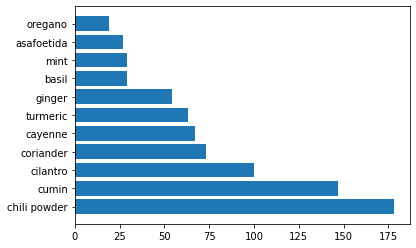

In [127]:
group_0 = spice_class_group_sum.loc[0,:]
group_0.sort_values(ascending=False, inplace=True)
group_0_df = pd.DataFrame(group_0)
group_0_df = group_0_df.reset_index()
group_0_df = group_0_df[group_0_df.index.values<=10]
plt.barh(group_0_df['index'], group_0_df.loc[:,0])


<BarContainer object of 11 artists>

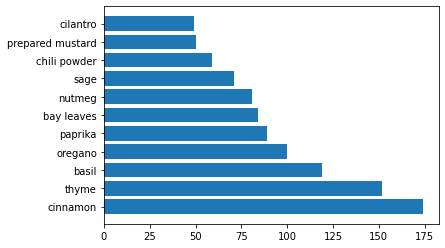

In [128]:
group_1 = spice_class_group_sum.loc[1,:]
group_1.sort_values(ascending=False, inplace=True)
group_1_df = pd.DataFrame(group_1)
group_1_df = group_1_df.reset_index()
group_1_df = group_1_df[group_1_df.index.values<=10]
plt.barh(group_1_df['index'], group_1_df.loc[:,1])


<BarContainer object of 11 artists>

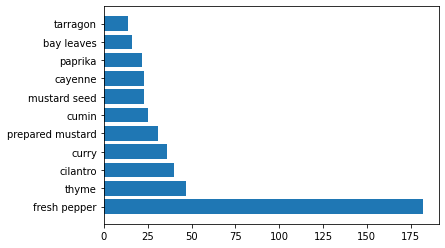

In [129]:
group_2 = spice_class_group_sum.loc[2,:]
group_2.sort_values(ascending=False, inplace=True)
group_2_df = pd.DataFrame(group_2)
group_2_df = group_2_df.reset_index()
group_2_df = group_2_df[group_2_df.index.values<=10]
plt.barh(group_2_df['index'], group_2_df.loc[:,2])


<BarContainer object of 11 artists>

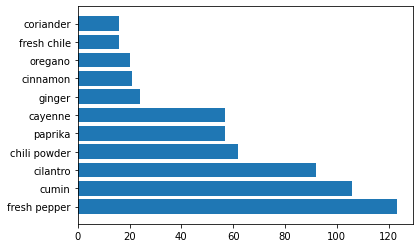

In [130]:
group_3 = spice_class_group_sum.loc[3,:]
group_3.sort_values(ascending=False, inplace=True)
group_3_df = pd.DataFrame(group_3)
group_3_df = group_3_df.reset_index()
group_3_df = group_3_df[group_3_df.index.values<=10]
plt.barh(group_3_df['index'], group_3_df.loc[:,3])


<BarContainer object of 11 artists>

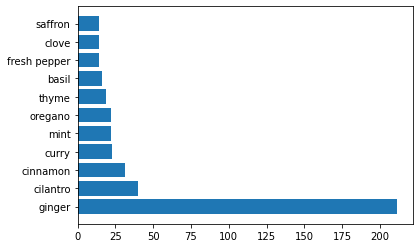

In [131]:
group_4 = spice_class_group_sum.loc[4,:]
group_4.sort_values(ascending=False, inplace=True)
group_4_df = pd.DataFrame(group_4)
group_4_df = group_4_df.reset_index()
group_4_df = group_4_df[group_4_df.index.values<=10]
plt.barh(group_4_df['index'], group_4_df.loc[:,4])
